In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

In [2]:
from matplotlib.colors import LogNorm

In [104]:
lats, lons, crossing = np.loadtxt('./acc_new_waves.txt')

In [175]:
list_of_modelbase_sals = np.loadtxt('base')
list_of_modelv18_sals = np.loadtxt('v18')
list_of_ferrybase_sals = np.loadtxt('ferry')
one_third = int(list_of_ferrybase_sals.shape[0]/3)
one_sixth = int(list_of_ferrybase_sals[0]/6)
list_of_modelnewwave = np.loadtxt('model_new_waves.txt')
list_of_ferrynewwave = np.loadtxt('ferry_new_waves.txt')

In [176]:
print (np.mean(list_of_ferrybase_sals[:one_sixth]), np.mean(list_of_ferrynewwave[:one_sixth]))
print (np.mean(list_of_modelbase_sals[:one_sixth]), np.mean(list_of_modelv18_sals[:one_sixth]), 
      np.mean(list_of_modelnewwave[:one_sixth]))

28.1695514232 28.1695514232
24.6075399001 25.0826247533 25.2731661002


In [177]:
print (np.mean(list_of_ferrybase_sals[:one_third]), np.mean(list_of_ferrynewwave[:one_third]))
print (np.mean(list_of_modelbase_sals[:one_third]), np.mean(list_of_modelv18_sals[:one_third]), 
      np.mean(list_of_modelnewwave[:one_third]))

25.0134161601 25.0134161601
26.312099168 26.5467630897 26.5434391103


### Model/Data Scatter Plots

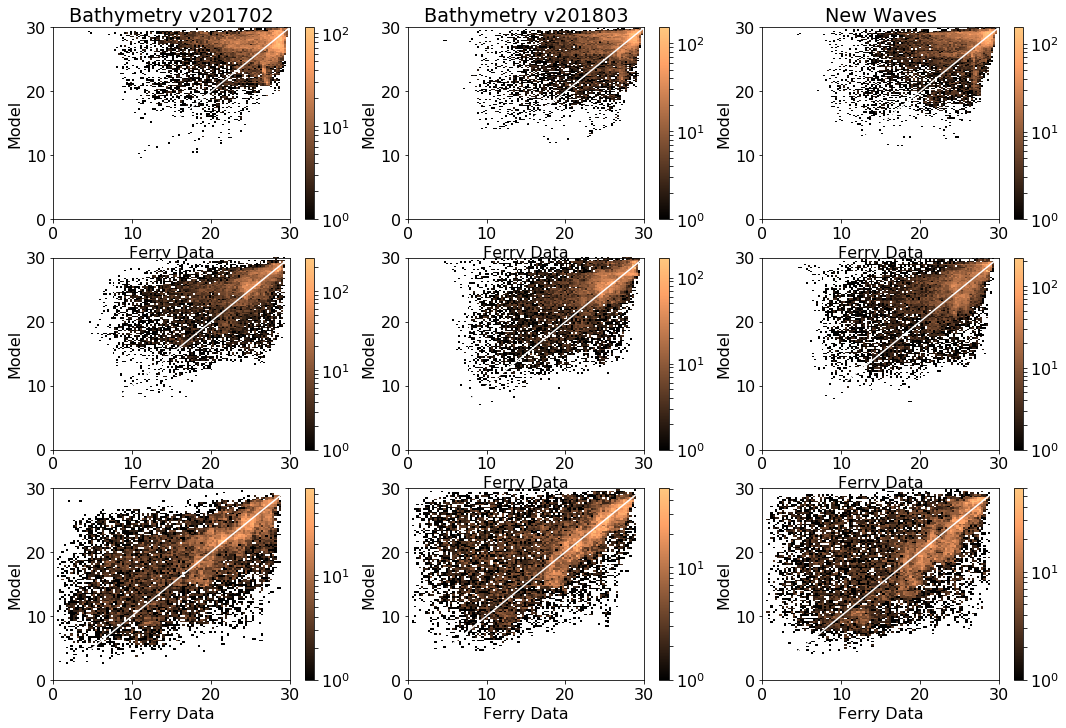

In [178]:
matplotlib.rcParams.update({'font.size': 16})
fig, axs = plt.subplots(3, 3, figsize = (18, 12))
c, xedge, yedge, im = axs[0, 0].hist2d(list_of_ferrybase_sals[:one_third], 
                                list_of_modelbase_sals[:one_third], bins = 100, norm=LogNorm(), cmap='copper')
im
fig.colorbar(im, ax=axs[0, 0])
c, xedge, yedge, im = axs[1, 0].hist2d(list_of_ferrybase_sals[one_third:2*one_third], 
                                list_of_modelbase_sals[one_third:2*one_third], bins = 100, norm=LogNorm(), cmap='copper')
im
fig.colorbar(im, ax=axs[1, 0])
c, xedge, yedge, im = axs[2, 0].hist2d(list_of_ferrybase_sals[2*one_third:], 
                                list_of_modelbase_sals[2*one_third:], bins = 100, norm=LogNorm(), cmap='copper')
im
fig.colorbar(im, ax=axs[2, 0])


c, xedge, yedge, im = axs[0, 1].hist2d(list_of_ferrybase_sals[:one_third], 
                                list_of_modelv18_sals[:one_third], bins = 100, norm=LogNorm(), cmap='copper')
im
fig.colorbar(im, ax=axs[0, 1])

c, xedge, yedge, im = axs[1, 1].hist2d(list_of_ferrybase_sals[one_third:2*one_third], 
                                list_of_modelv18_sals[one_third:2*one_third], bins = 100, norm=LogNorm(), cmap='copper')
im
fig.colorbar(im, ax=axs[1, 1])

c, xedge, yedge, im = axs[2, 1].hist2d(list_of_ferrybase_sals[2*one_third:], 
                                list_of_modelv18_sals[2*one_third:], bins = 100, norm=LogNorm(), cmap='copper')
im
fig.colorbar(im, ax=axs[2, 1])

c, xedge, yedge, im = axs[0, 2].hist2d(list_of_ferrynewwave[:one_third], 
                                list_of_modelnewwave[:one_third], bins = 100, norm=LogNorm(), cmap='copper')
im
fig.colorbar(im, ax=axs[0, 2])

c, xedge, yedge, im = axs[1, 2].hist2d(list_of_ferrynewwave[one_third:2*one_third], 
                                list_of_modelnewwave[one_third:2*one_third], bins = 100, norm=LogNorm(), cmap='copper')
im
fig.colorbar(im, ax=axs[1, 2])

c, xedge, yedge, im = axs[2, 2].hist2d(list_of_ferrynewwave[2*one_third:3*one_third], 
                                list_of_modelnewwave[2*one_third:3*one_third], bins = 100, norm=LogNorm(), cmap='copper')
im
fig.colorbar(im, ax=axs[2, 2])

axs[0, 1].set_title('Bathymetry v201803');
axs[0, 0].set_title('Bathymetry v201702')
axs[0, 2].set_title('New Waves')
    
for ax in [axs[0, 0], axs[0, 1], axs[1, 0], axs[1, 1], axs[2, 0], axs[2, 1], 
           axs[0, 2], axs[1, 2], axs[2, 2]]:
    ax.set_xlabel('Ferry Data')
    ax.set_ylabel('Model')
    ax.set_xlim((0, 30))
    ax.set_ylim((0, 30))
    ax.plot([0, 30], [0, 30], 'w');

In [179]:
print('bias =  ' + str(-np.mean(list_of_ferrybase_sals) + np.mean(list_of_modelbase_sals)))
print('RMSE = ' + str(np.sqrt(np.sum((list_of_modelbase_sals - list_of_ferrybase_sals)**2) 
                              / len(list_of_modelbase_sals))))
xbar = np.mean(list_of_ferrybase_sals)
print('Willmott = ' + str(1-(np.sum((list_of_modelbase_sals - list_of_ferrybase_sals)**2)  / 
                             np.sum((np.abs(list_of_modelbase_sals - xbar) 
                                     + np.abs(list_of_ferrybase_sals - xbar))**2))))

print('bias =  ' + str(-np.mean(list_of_ferrybase_sals) + np.mean(list_of_modelv18_sals)))
print('RMSE = ' + str(np.sqrt(np.sum((list_of_modelv18_sals - list_of_ferrybase_sals)**2) 
                              / len(list_of_modelv18_sals))))

print('Willmott = ' + str(1-(np.sum((list_of_modelv18_sals - list_of_ferrybase_sals)**2)  / 
                             np.sum((np.abs(list_of_modelv18_sals - xbar) 
                                     + np.abs(list_of_ferrybase_sals - xbar))**2))))

xbar = np.mean(list_of_ferrynewwave)
print('bias =  ' + str(-np.mean(list_of_ferrynewwave) + np.mean(list_of_modelnewwave)))
print('RMSE = ' + str(np.sqrt(np.sum((list_of_modelnewwave - list_of_ferrynewwave)**2) 
                              / len(list_of_modelnewwave))))

print('Willmott = ' + str(1-(np.sum((list_of_modelnewwave - list_of_ferrynewwave)**2)  / 
                             np.sum((np.abs(list_of_modelnewwave - xbar) 
                                     + np.abs(list_of_ferrynewwave - xbar))**2))))

bias =  1.14326188205
RMSE = 4.7159558423
Willmott = 0.796563982277
bias =  1.74400187208
RMSE = 5.06411993071
Willmott = 0.758855251137
bias =  1.81341018128
RMSE = 5.52494066159
Willmott = 0.760212757244


|  Salinity         | Bias          | RMSE          | WS             |
|-----------|---------------|---------------|----------------|
| Base Case | 1.52707575253 | 5.24464144716 | 0.777509231541 |
| Test A    | 1.94161838071 | 5.56267806197 | 0.743195687801 |
| Test B    | 1.79176312479 | 5.34840517666 | 0.767047886945 |

### Track by Track

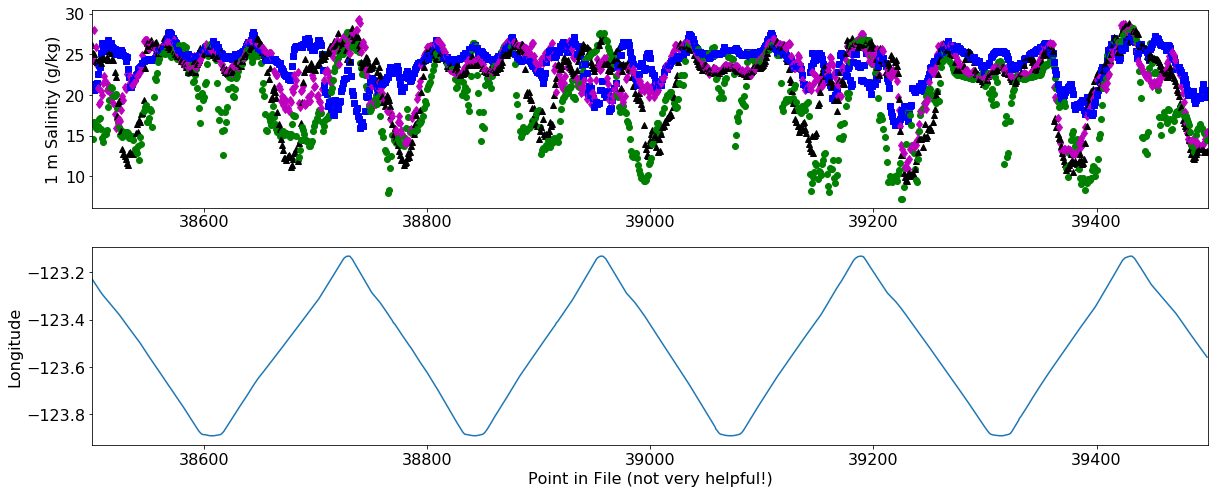

In [192]:
ib, il = 38500, 39500
fig, axs = plt.subplots(2, 1, figsize=(20, 8))
for i in range(ib, il):
    if lons[i] < -123.1 and lons[i]> -123.9:
        axs[0].plot(i, list_of_ferrybase_sals[i], 'go')
        axs[0].plot(i, list_of_modelbase_sals[i], 'bs')
        axs[0].plot(i, list_of_modelv18_sals[i], 'dm')
        axs[0].plot(i, list_of_modelnewwave[i], '^k')
axs[1].plot(range(ib,il), lons[ib:il]);
#axs[1].plot(range(ib,il), -123.2*np.ones(il-ib))
#axs[1].plot(range(ib,il), -123.8*np.ones(il-ib))
axs[0].set_xlim((ib, il))
axs[1].set_xlim((ib, il))
axs[1].set_xlabel('Point in File (not very helpful!)')
axs[1].set_ylabel('Longitude')
axs[0].set_ylabel('1 m Salinity (g/kg)')

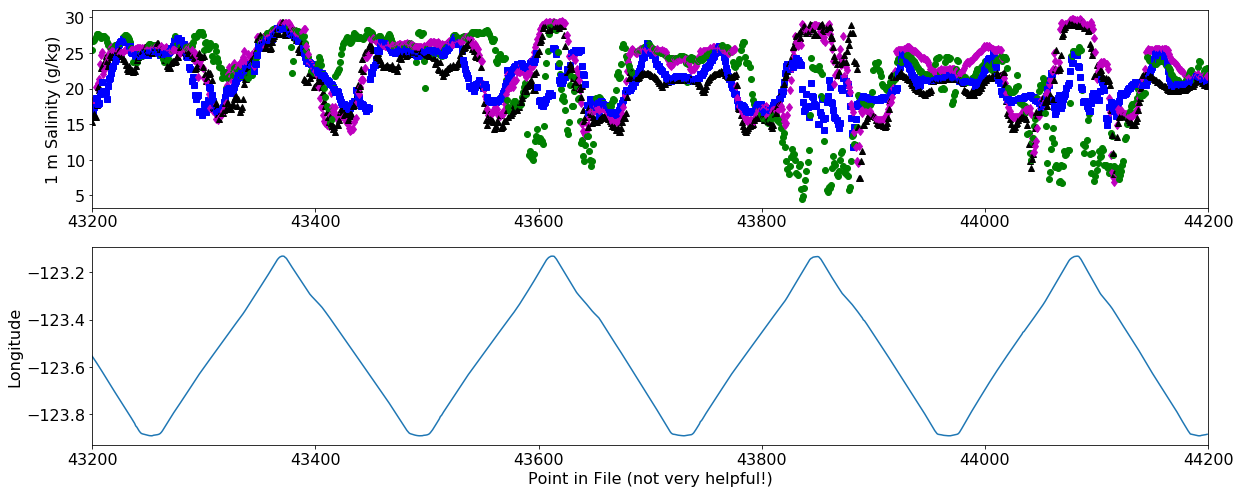

In [191]:
ib, il = 43200, 44200
fig, axs = plt.subplots(2, 1, figsize=(20, 8))
for i in range(ib, il):
    if lons[i] < -123.1 and lons[i]> -123.9:
        axs[0].plot(i, list_of_ferrybase_sals[i], 'go')
        axs[0].plot(i, list_of_modelbase_sals[i], 'bs')
        axs[0].plot(i, list_of_modelv18_sals[i], 'dm')
        axs[0].plot(i, list_of_modelnewwave[i], '^k')
axs[1].plot(range(ib,il), lons[ib:il]);
#axs[1].plot(range(ib,il), -123.2*np.ones(il-ib))
#axs[1].plot(range(ib,il), -123.8*np.ones(il-ib))
axs[0].set_xlim((ib, il))
axs[1].set_xlim((ib, il))
axs[1].set_xlabel('Point in File (not very helpful!)')
axs[1].set_ylabel('Longitude')
axs[0].set_ylabel('1 m Salinity (g/kg)')

18.4964346888 23.6920740614 22.1700615165 20.943254006


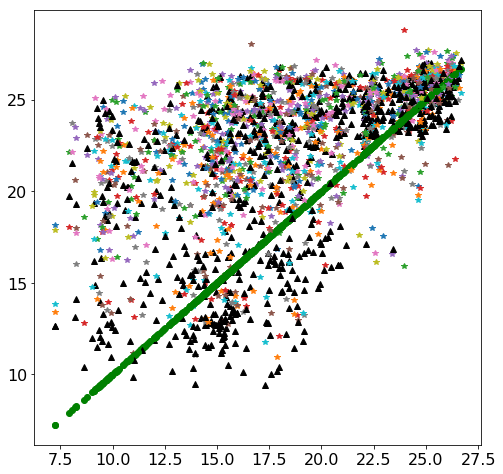

In [137]:
ib, il = 38500, 39500
fig, axs = plt.subplots(1, 1, figsize=(8, 8))
sum0 = 0
sum1 = 0
sum2 = 0
sum3 = 0
scount = 0
for i in range(ib, il):
    if lons[i] < -123.2 and lons[i]> -123.8:
        axs.plot(list_of_ferrybase_sals[i], list_of_ferrybase_sals[i], 'go')
        sum0 += list_of_ferrybase_sals[i]
        axs.plot(list_of_ferrybase_sals[i], list_of_modelbase_sals[i], '*')
        sum1 += list_of_modelbase_sals[i]
        axs.plot(list_of_ferrybase_sals[i], list_of_modelv18_sals[i], '*')
        sum2 += list_of_modelv18_sals[i]
        axs.plot(list_of_ferrybase_sals[i], list_of_modelnewwave[i], '^k')
        sum3 += list_of_modelnewwave[i]
        scount += 1
        
print (sum0/scount, sum1/scount, sum2/scount, sum3/scount)

In [116]:
print (one_third*2)

38844


At 38900 the new wave model is doing excellent

At 18900 the observations have the plume offshore

At 48900 the observations have the plume onshore. I'm missing a super fresh component of the plume right at the start of the ferry run.

At 20500, 21500, 23500 I'm just not fresh enough

4.0
5.0
6.0
7.0
8.0
1.0
2.0
3.0
4.0


(7, 30)

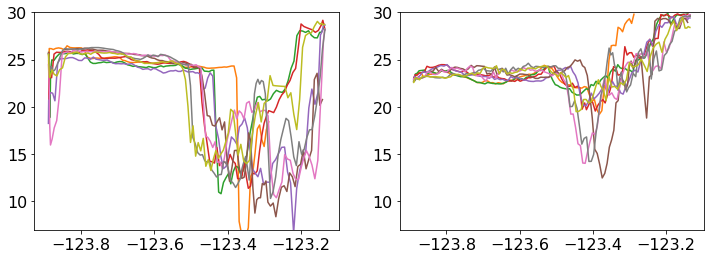

In [180]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
sal_cross = np.zeros((300))
lon_cross = np.zeros((300))
model_sal = np.zeros((300))
count = 0
for n in range(23600, 24600):
    if crossing[n] > 0:
        if crossing[n] != prevcrossing:
            print(crossing[n])
            axs[0].plot(lon_cross[:count], sal_cross[:count], label=str(crossing[n]))
            axs[1].plot(lon_cross[:count], model_sal[:count], label=str(crossing[n]))
            prevcrossing = crossing[n]
            count = 0            
        sal_cross[count] = list_of_ferrynewwave[n]
        model_sal[count] = list_of_modelnewwave[n]
        lon_cross[count] = lons[n]
        count += 1
    else:
        prevcrossing = 0
axs[0].set_ylim((7, 30))
axs[1].set_ylim((7, 30))